# Inspect ScaleVarianceTask on decam calexps
We plot the ScaleVariance correction factors for some calexps and deepCoadd_directWarp that go into the hits2015 template.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from lsst.daf.butler import Butler
from astropy.visualization import ZScaleInterval
from lsst.pipe.tasks.scaleVariance import ScaleVarianceTask, ScaleVarianceConfig
import numpy as np
from astropy.table import Table
plt.rcParams['figure.figsize'] = (8.5, 5)

In [2]:
# Meredith's repo that contains the warped calexps before coaddition
butler=Butler('/project/mrawls/hits2015-3', collections='DECam/templates/DM-27370/20210108T034942Z',
              writeable=False)

In [3]:
# These visits were manually selected for the coadd template generation
good2014Visits = (288976, 289016, 289409, 289493, 289614, 289820, 289871, 
                  292405, 288975, 289408, 289492, 289696, 289828, 289912, 
                  292413, 288970, 289010, 289403, 289650, 289691, 289823, 
                  289865, 292404)

In [4]:
# Use one of them
visitId = good2014Visits[0]
print(visitId)

288976


In [5]:
# deepCoadd_directWarp: all tract-patch that overlap with (any detectors of) the visit
dataRefs = set(butler.registry.queryDatasets("deepCoadd_directWarp", dataId={'band':'g', 'visit': visitId}))

In [6]:
scaleConfig = ScaleVarianceConfig()
scaleTask = ScaleVarianceTask(config=scaleConfig)
R = []
for cref in dataRefs:
    singleP = butler.get(cref)
    try:
        # There are some patches with all NaN where this task fails with runtime error
        scaleFactor = scaleTask.calculateBothFactors(singleP.getMaskedImage())
        x = [ cref.dataId['tract'], cref.dataId['patch'], scaleFactor.pixFactor, scaleFactor.imageFactor]
        R.append(x)
        print(x)
    except:
        print("Failed: ",cref.dataId['tract'], cref.dataId['patch'])
        pass

[7, 66510, 0.6603830851604426, 0.6601740786153926]
[4, 25837, 0.5052336850937751, 0.5403607902704207]
[4, 24795, 0.6269840598001224, 0.6253555026145984]
[4, 24794, 0.638501009882807, 0.6310366103438505]
[7, 68966, 0.6572603764419278, 0.6503644619536998]
[4, 25138, 0.5982743696441272, 0.6738053529925212]
[7, 66862, 0.6160496154096422, 0.6005445919806929]
[4, 25494, 0.646320505831144, 0.6442764715107242]
[7, 69311, 0.6337058198824419, 0.6316827348454148]
[7, 66511, 0.7288388923933803, 0.7301546747653164]
[4, 24790, 0.6415430794928102, 0.6419082961910053]
[7, 68259, 0.45611663984565815, 0.40853738691086655]
[7, 67915, 0.6490122161277158, 0.6462488302654614]
[4, 24440, 0.627222360258709, 0.6304791062655581]
[4, 25492, 0.676991805868057, 0.6754161350016367]
[7, 69310, 0.5980537427680841, 0.5974782302037907]
[7, 67911, 0.39253093714805254, 0.3274837548217809]
[4, 27238, 0.6488042550834607, 0.6485491232117053]
[7, 69309, 0.5947868781092837, 0.5940697757489387]
[4, 26893, 0.603064604084968, 0.

[4, 24786, 0.6538938956513315, 0.6515831888753602]
[4, 23738, 0.7298985244561852, 0.73052901488713]
[7, 67917, 0.6323233897467017, 0.6311137894416846]
[4, 25144, 0.6288449660011851, 0.6281138187380498]
[4, 24091, 0.6868334657969188, 0.6819575944825177]
[4, 25490, 0.3640110563897445, 0.3583756507875003]
[7, 67562, 0.6459265370333908, 0.6433115782623811]
[4, 23740, 0.7433865330336444, 0.742524944729777]
[4, 25845, 0.6379866656651448, 0.6345798966083974]
[4, 25135, 0.2836908678430401, 0.28339903321682974]
[4, 25139, 0.5994838404821828, 0.6721843428260064]
[7, 66512, 0.667331958800112, 0.6880889918065534]
[7, 69313, 0.6197879864274456, 0.6106237634144965]
[7, 69315, 0.6802579137459845, 0.6928645148322848]
[7, 67916, 0.6281911170189401, 0.6261778832962018]
[7, 68612, 0.648206956646499, 0.6617970105416405]
[4, 25488, 0.35363766480882286, 0.35118354045033884]
[4, 24789, 0.6399770776893815, 0.6359149837894467]
[4, 25140, 0.6099097457545345, 0.6618121995203761]
[7, 69665, 0.6000746919521176, 0.

In [7]:
T = Table(names=['tract', 'patch', 'pixFactor', 'imgFactor'], rows=R)

<IPython.core.display.Javascript object>


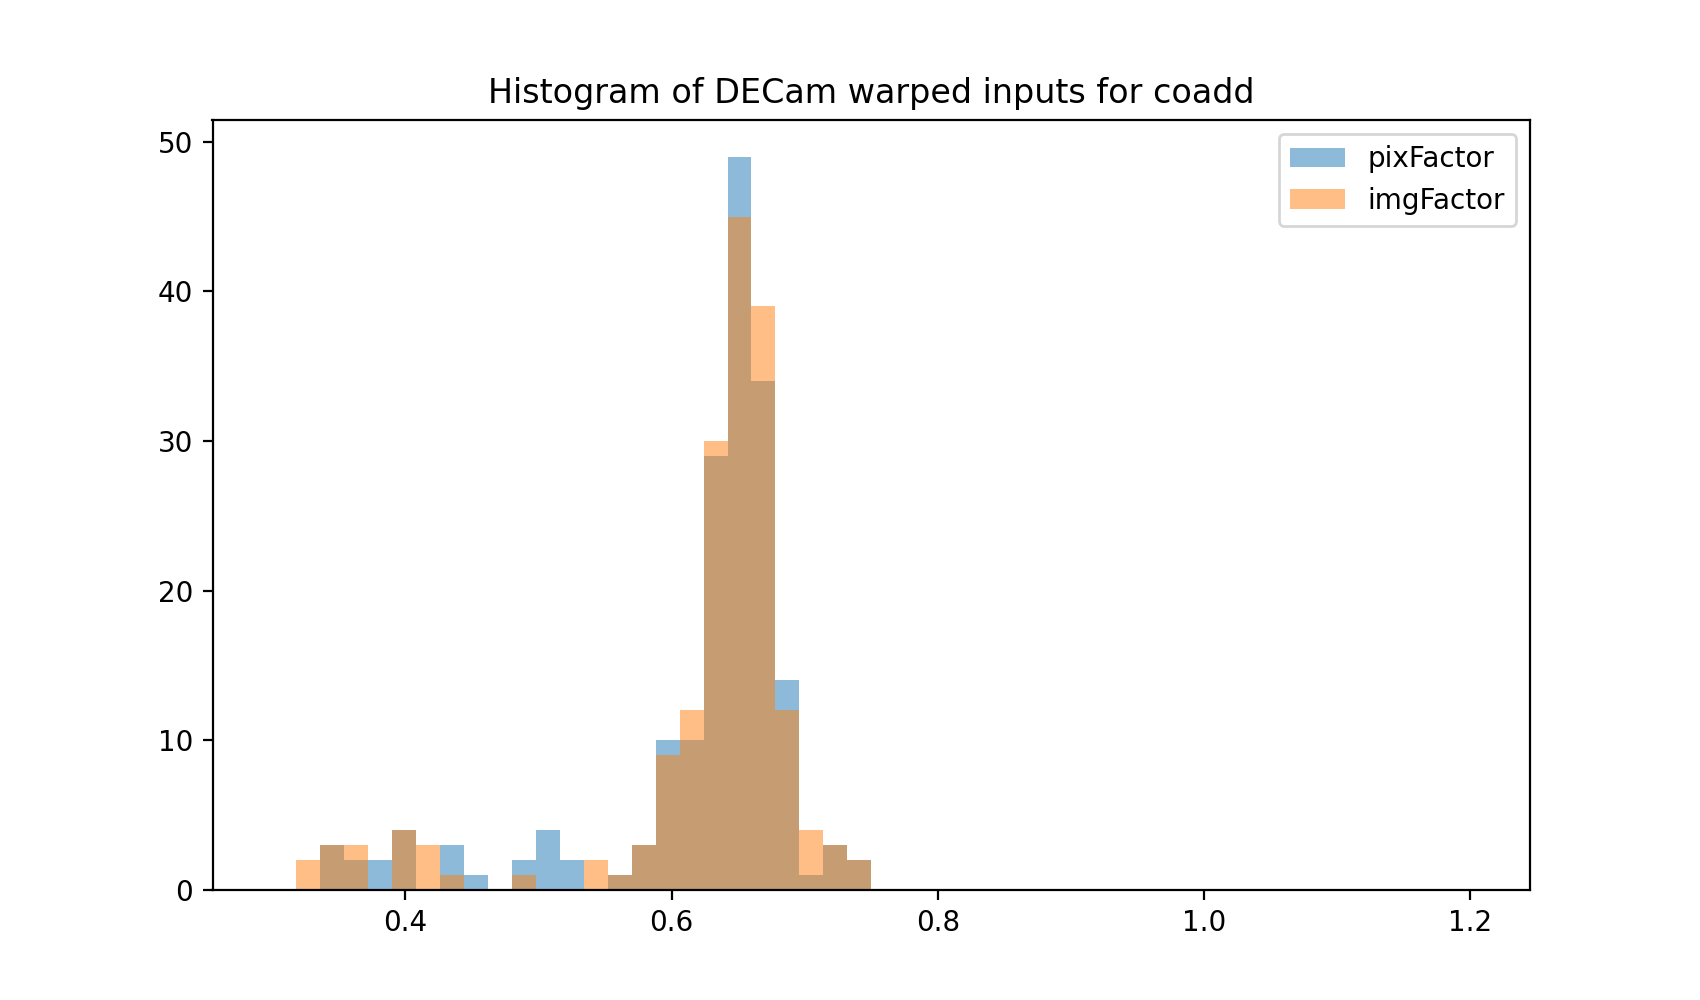

In [8]:
fig, ax = plt.subplots()
ax.hist(T['pixFactor'], bins=50, range=(0.3, 1.2), alpha=0.5, label='pixFactor')
ax.hist(T['imgFactor'], bins=50, range=(0.3, 1.2), alpha=0.5, label='imgFactor')
ax.set_title("Histogram of DECam warped inputs for coadd")
ax.legend()

----------

Now see the individual calexps without being warped to the skymap grid

In [9]:
# Meredith's repo that contains the calexps before warping
butler2014=Butler('/project/mrawls/hits2014-3', collections='DECam/templates/DM-27370/20210108T034942Z',
              writeable=False)
calexpRefs = set(butler2014.registry.queryDatasets("calexp", dataId={'band':'g', 'visit': visitId}))

In [10]:
scaleConfig = ScaleVarianceConfig()
scaleTask = ScaleVarianceTask(config=scaleConfig)
R = []
for cref in calexpRefs:
    singleP = butler2014.get(cref)
    try:
        # There are some patches with all NaN where this task fails with runtime error
        scaleFactor = scaleTask.calculateBothFactors(singleP.getMaskedImage())
        x = [ cref.dataId['visit'], cref.dataId['detector'], scaleFactor.pixFactor, scaleFactor.imageFactor]
        R.append(x)
        print(x)
    except:
        print("Failed: ",cref.dataId['visit'], cref.dataId['detector'])
        pass

[288976, 52, 0.66081770470185, 0.6607384732132523]
[288976, 21, 0.6744516731277153, 0.6743256011124471]
[288976, 25, 0.6315298861887085, 0.6311329952978996]
[288976, 54, 0.6480657352173185, 0.6472611500857581]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[288976, 9, 0.6692151586378696, 0.6688578951110785]
[288976, 17, 0.6817348397735344, 0.6819205050336058]
[288976, 18, 0.6468990193729387, 0.646537370496856]
[288976, 59, 0.6552357661197882, 0.6550844131033168]
[288976, 24, 0.6316173781998607, 0.6321204423209018]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[288976, 8, 0.701920137261224, 0.701777297341546]
[288976, 43, 0.6752507406819402, 0.6758193148577764]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[288976, 46, 0.6402874849747278, 0.6393025223634276]
[288976, 38, 0.2707903703972589, 0.26996769638262386]
[288976, 23, 0.6227842077765329, 0.621820094418117]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[288976, 56, 0.6549971100512852, 0.654508929066354]
[288976, 31, 0.4018075708101049, 0.4018433122185795]
[288976, 11, 0.6187895445973209, 0.6183777658386074]
[288976, 10, 0.6236094683376998, 0.6235949727403406]
[288976, 36, 0.3235588220158029, 0.3242395819317609]
[288976, 35, 0.34082938689105824, 0.3406326052335088]
[288976, 26, 0.6955558624019691, 0.6953661978186995]
[288976, 48, 0.6189350694824575, 0.6202219464092629]
[288976, 28, 0.40472255458207307, 0.4050833083346074]
[288976, 37, 0.33303658084984994, 0.33582514496075316]
[288976, 60, 0.6702877387472035, 0.6700554007181937]
[288976, 33, 0.6256428606996159, 0.6257691024410851]
[288976, 6, 0.6578721875435847, 0.6571914812796195]
[288976, 32, 0.6610030175828348, 0.6607401174906888]
[288976, 39, 0.6308932103762795, 0.6309291605238835]
[288976, 45, 0.6294351153610425, 0.6292178251684584]
[288976, 20, 0.6827696026519374, 0.6825475076634657]
[288976, 40, 0.6571827646843938, 0.6571746424203602]
[288976, 27, 0.6556082778152632, 0.655135180

/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[288976, 1, 0.647774250580983, 0.6480426612001756]
[288976, 53, 0.6486979601734016, 0.6485593702863371]
[288976, 15, 0.6824337037109097, 0.6810967497206772]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[288976, 34, 0.6806713127027237, 0.6804949768025687]
[288976, 50, 0.6533911958982526, 0.6546956846724528]
[288976, 30, 0.39476921712687585, 0.39401610910160595]
[288976, 55, 0.6608769388890885, 0.6605464785597873]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[288976, 58, 0.5925334694193225, 0.5925625929242413]
[288976, 42, 0.6746129848406257, 0.6743791279381616]
[288976, 19, 0.6750067272502838, 0.6745886182881637]
[288976, 5, 0.5822401291200197, 0.5824349477230736]
[288976, 47, 0.6641489721120533, 0.6644057048732828]
[288976, 51, 0.6665493852112438, 0.6660328918752508]
[288976, 22, 0.6591177549939133, 0.659052574019944]


/project/gkovacs/devel/DM-22396_pipe_tasks/python/lsst/pipe/tasks/scaleVariance.py:181: RuntimeWarning: invalid value encountered in sqrt
  snr = maskedImage.image.array/np.sqrt(variance.array)


[288976, 16, 0.6239326390425062, 0.6239550617944498]
[288976, 12, 0.6104255871938837, 0.6100841399458679]
[288976, 61, 0.6114365750004197, 0.6192265716231924]
[288976, 62, 0.7322686958734598, 0.7322454308959992]
[288976, 7, 0.5988855828596287, 0.598573835397972]
[288976, 29, 0.39792452460869476, 0.3978280603680042]
[288976, 57, 0.6965610607314742, 0.6964990700237711]
[288976, 41, 0.6660267246794859, 0.6655247523706266]
[288976, 44, 0.6775421313340727, 0.6768340128173495]
[288976, 14, 0.6814966303316184, 0.6795863476050489]
[288976, 49, 0.655504569525094, 0.65449588368688]
[288976, 13, 0.6521482575818415, 0.6519000647124761]


In [11]:
T = Table(names=['visit', 'detector', 'pixFactor', 'imgFactor'], rows=R)

<IPython.core.display.Javascript object>


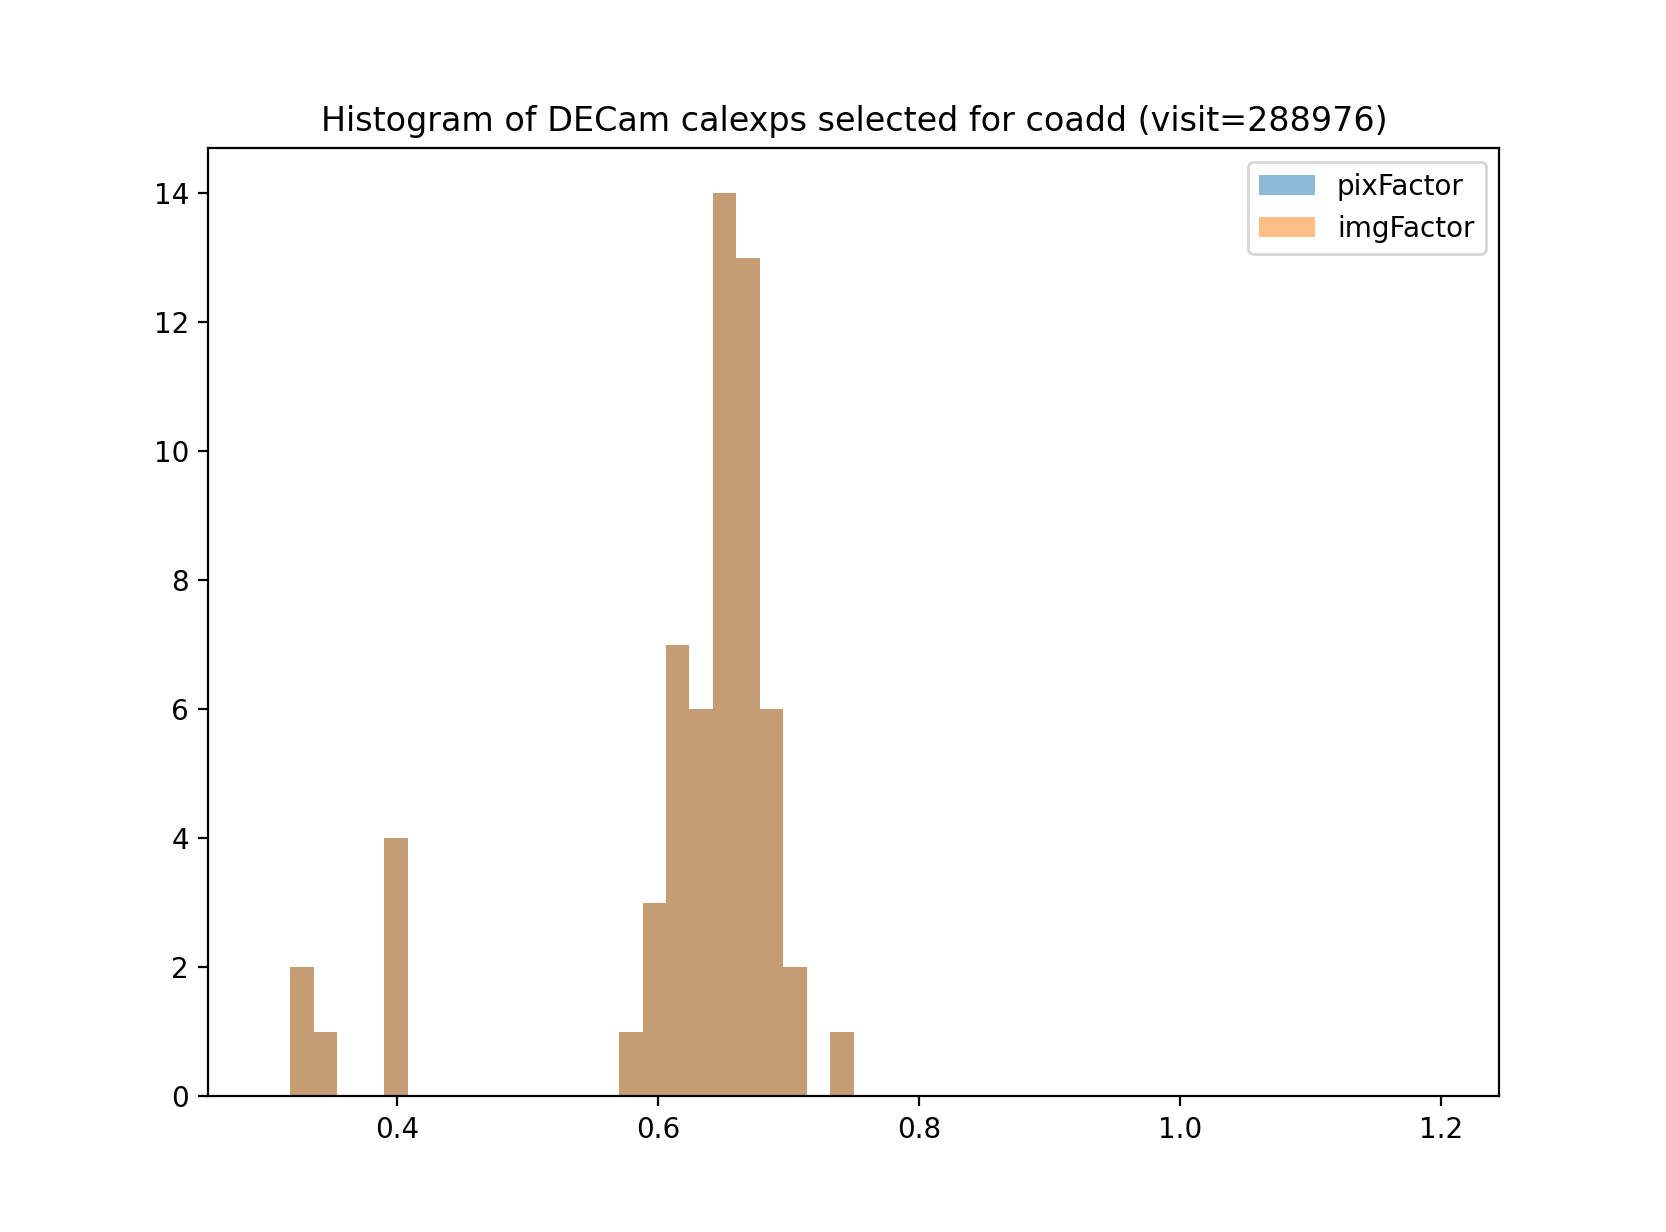

In [12]:
fig, ax = plt.subplots()
ax.hist(T['pixFactor'], bins=50, range=(0.3, 1.2), alpha=0.5, label='pixFactor')
ax.hist(T['imgFactor'], bins=50, range=(0.3, 1.2), alpha=0.5, label='imgFactor')
ax.set_title("Histogram of DECam calexps selected for coadd (visit={})".format(T['visit'][0]))
ax.legend()

------

(minimum=(0, 0), maximum=(2047, 4095))


<IPython.core.display.Javascript object>


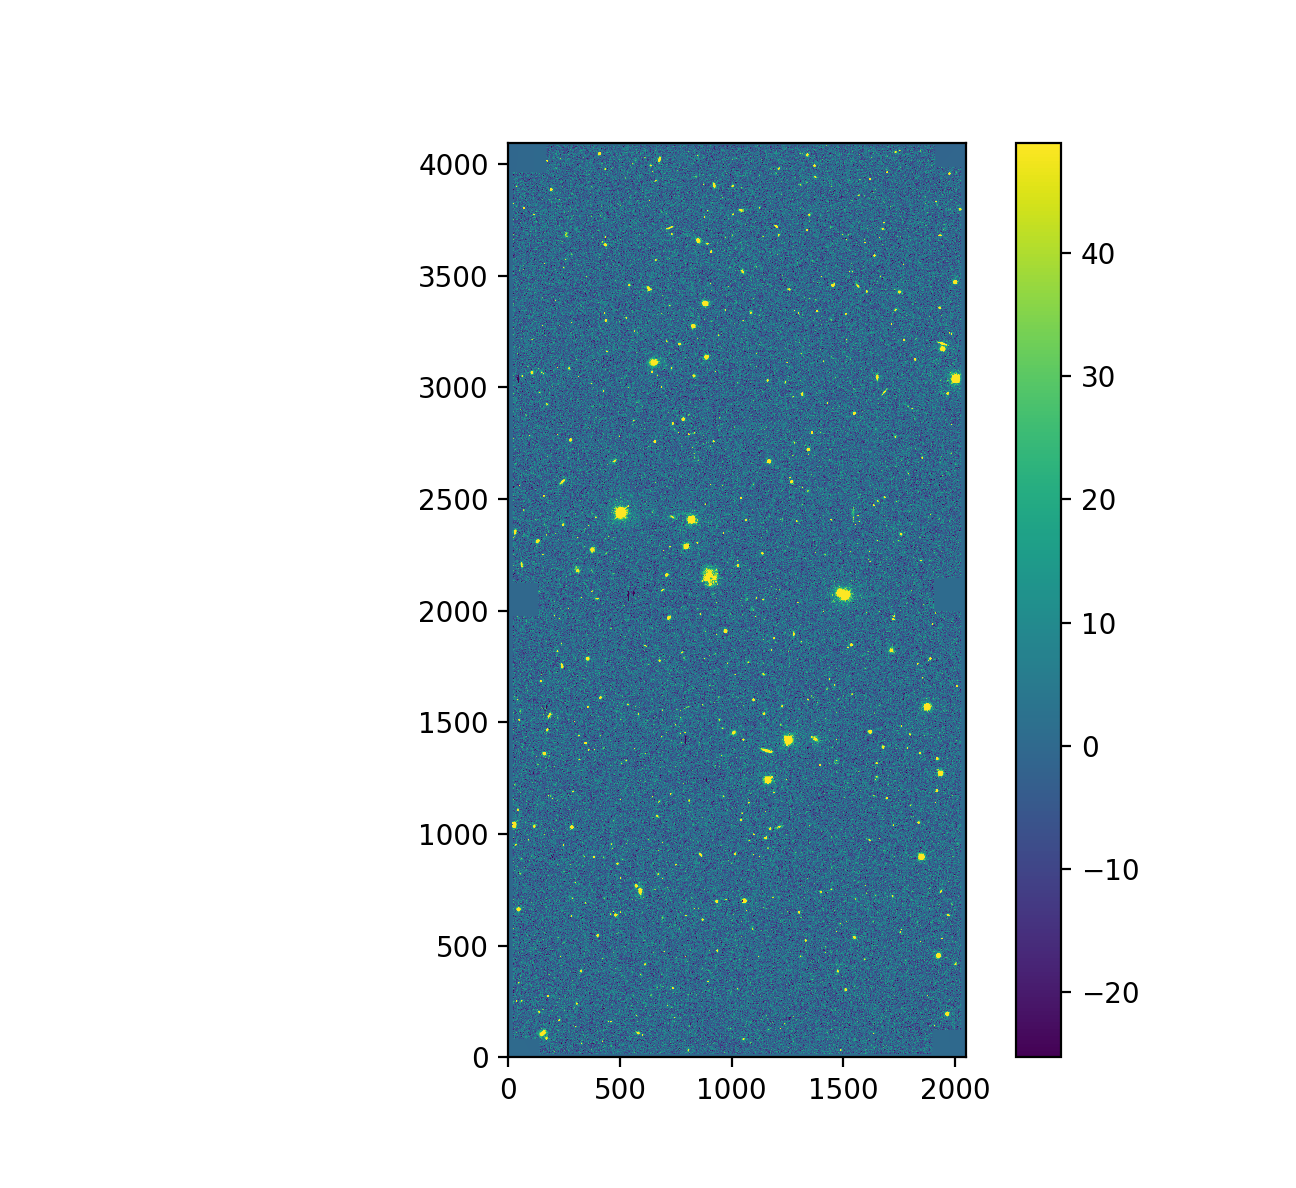

In [16]:
# Show the last image
zScaler = ZScaleInterval()
vmin, vmax = zScaler.get_limits(singleP.image.array)
bbox = singleP.getBBox()
print(bbox)
fig, ax = plt.subplots(nrows=1, ncols=1)
img = ax.imshow(singleP.image.array, origin='lower', interpolation='none', vmin=vmin, vmax=vmax, 
          extent=[bbox.getMinX()-0.5, bbox.getMaxX()+0.5, bbox.getMinY()-0.5, bbox.getMaxY()+0.5])
fig.colorbar(img)